In [1]:
# September 2021

# Линейная регрессия

In [2]:
! pip install pingouin --upgrade
! pip install mlxtend

In [3]:
import pandas as pd # для работы с датафреймом
import numpy as np # для вычислений
import matplotlib.pyplot as plt # для графиков
import seaborn as sns # для графиков
import statsmodels.api as sm # для статистического анализа
from scipy import stats # для статистического анализа
from mlxtend.evaluate import permutation_test # перестановочный тест
from sklearn.model_selection import train_test_split # для деления на обучающую и тестовую выборки
from sklearn.impute import SimpleImputer # для заполнения пропусков
from sklearn.preprocessing import OneHotEncoder # для кодирования категориальных переменных
from sklearn.pipeline import Pipeline # для обработки данных для машинного обучения
from sklearn.preprocessing import StandardScaler # стандартизация данных
from sklearn.compose import ColumnTransformer # для обработки данных для машинного обучения
import pingouin as pg # для статистического анализа

# Введение

Линейная регрессия является методом машинного обучения. Это означает, что линейная регрессия применяется для построения модели, которая обучается на имеющихся данных, чтобы предсказать новые данные. 

Методы машинного обучения можно разделить на:

1) обучение с учителем;
2) обучение без учителя;
3) обучение с подкреплением.

Линейная регрессия относится к методом обучения с учителем. Это предполагает, что у нас есть данные, которые мы используем для обучения. Эти данные разделены на:

1) признаки;
2) целевой признак.

Терминология в машинном обучении значительно отличается от учебника к учебнику. Однако в этой и последующих главах мы будем использовать терминологию, которая введена выше. 

Обратимся сразу к примеру на основе наших данных о книгах:

**num_pages**, **language_code** - это признаки,
**average_rating** - целевой признак.

Обучение с учителем означает, что мы берем наши признаки и на их основе с помощью математических операций находим связи с целевым признаком. Характер этой связи между признаками и целевым признаком: конкретные значения признаков определяют конкретный целевой признак. 

Давайте визуализируем это еще следующим образом. Представим таблицу. В таблице у нас по горизонтали - строки, по вертикали - столбцы. Одна строка - это одно наблюдение (в нашем случае - одна книга). Столбцы, относящиеся к этой строке, - это признаки данного конкретного наблюдения (количество страниц, количество обзоров и т.п.). Среди столбцов мы выделяем целевой признак - средняя оценка. Это то, что мы хотим научиться предсказывать. Остальные столбцы - это признаки. Мы хотим на основании оставшихся столбцов (признаков) определять целевой признак.

Все методы машинного обучения предполагают, что выполняются условия их применимости. Здесь все обстоит также, как и при применении статистических методов.

Применение линейной регрессии предполагает выполнение следующих условий: 
* целевой признак - непрерывная величина, признак - может быть непрерывной или категориальной (дихотамической) переменной;
* оценка одной книги не зависит от оценки другой. Определяется исследователем;
* линейность отношений. Проверяется по графику. Например, в случае, если у нас один признак и целевой признак, график строится так: по **x** расположены значения признака, по **y** расположены значения целевого признака;
* непрерывные переменные должны быть нормально распределены и не должны иметь выбросов. Из нашего статистического анализа во второй главе проекта известно, что данные не распределены нормально. Однако в некоторых руководствах встречается утверждение, что данное условие не является обязательным. Кроме того, как указывалось в той же главе 2, если у нас большой объем данных, то мы можем положиться на центральную предельную теорему, то есть считать, что требование о нормальном распределении выполняется;
* гомоскедастичность, то есть постоянство ошибок предсказания модели. Это проверяется уже после построения модели на графике остатков;
* нормальность распределения ошибок. Это также проверяется уже после построения модели, можно использовать гистограмму по остаткам;
* если мы применяем два и более признака, то необходимо проверка на мультиколлинеарность. И это проверяется после построения модели, но с помощью специальных тестов.
* шкалирование данных. Это не является собственно условием применения линейной регрессии. Однако шкалирование требуется практически для всех методов машинного обучения, особенно в случае, если предполагается рассмотрение влияния на целевой признак не отдельных признаков, а их взаимосвязей. Если один признак выражен в миллионах, а другой в сотнях, то первый будет иметь больший вес уже только в силу этого. В отдельных руководствах утверждается, что, как правило, не требуется шкалирование целевого признака.

При применении методов машинного обучения надо помнить следующую рекомендацию: всегда надо искать самый простой способ решения задачи. Если наша линейная регрессия будет хорошо справляться, то использовать более сложные способы не надо. Если же эти сложные способы дадут незначительное улучшение, то также не надо их использовать, если это ведет к излишней трате вычислительного времени. Поэтому более сложные методы мы можем использовать, если:

1) регрессия к нашей задаче не подходит;
2) другой метод не только лучше себя показывает, но и находится на том же уровне эффективности (или выше).

Дополнительно стоит отметить следующее. Даже полное соответствие данных указанным выше условиям и применение самого продвинутого метода обучения с самым лучшим набором параметров не означает, что удастся получить модель, которая будет хорошо работать. В некоторых публикациях встречается, и даже доказывается, утверждение, что главное значение имеет не столько применяемый метод машинного обучения, сколько качество данных. 

Линейная регрессия может быть применена различными способами и с помощью разлинчых библиотек. Все эти способы условно можно разделить на три подхода:

1) визуальный;
2) статистический;
3) собственно машинное обучение.

Это деление является условным и необходимо только для лучшего понимания материала ниже.

**Внимание!**

Линейная регрессия имеет важное ограничение. При предсказаниях на основе линейной модели нельзя выходить за границы данных, по которым обучена модель. Если модель обучена по максимальной цене в 10, то нельзя предсказывать для цены в 100.

## Рекомендуемая литература (все книги, указанные ниже по тексту, также указаны здесь):

1) Сара Бослаф Статистика для всех
2) П. Брюс Практическая статистика для специалистов Data Science
3) С. Рашка, В. Мирджалили Python и машинное обучение

Рекомендуемые книги по математике см. [здесь](https://medium.com/data-science-with-ruslan-nazarov/книги-по-data-science-и-математике-для-начинающих-6257214d82d7)

## Онлайн-ресурсы:

1) хорошее описание статистических процедур [PYTHON FOR DATA SCIENCE. LINEAR REGRESSION](https://www.pythonfordatascience.org/linear-regression-python/)
2) [OLS Regression: Boston Housing Dataset](https://www.datasklr.com/ols-least-squares-regression/ols-regression-boston-housing-dataset)
3) хорошее введение в линейную алгебру [здесь](https://pabloinsente.github.io/intro-linear-algebra#matrix-decompositions)

Видео-версия находится [здесь](https://youtu.be/YFqT70RheVs).

Дополнительный полезный код, который может быть применен в том числе к задаче статистического обследования данных, можно также найти в главе 7.

# Загрузка данных

In [4]:
data = pd.read_csv('D:/Data Science/Проекты/Metod_Goodreads/git_goodreads/gd_augmentation.csv', dtype = {'decade':'object','quarter':'object', 'tra_co':'object', 'multivolume':'object'}) 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10838 non-null  object 
 1   average_rating      10838 non-null  float64
 2   language_code       10838 non-null  object 
 3   num_pages           10838 non-null  int64  
 4   ratings_count       10838 non-null  int64  
 5   text_reviews_count  10838 non-null  int64  
 6   decade              10838 non-null  object 
 7   quarter             10838 non-null  object 
 8   tra_co              10838 non-null  object 
 9   multivolume         10838 non-null  object 
 10  len_title           10838 non-null  int64  
 11  polarity            10838 non-null  float64
 12  subjectivity        10838 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 1.1+ MB


In [6]:
# удалим признаки, которые не будем рассматривать в этом исследовании
# работать будем с копией данных

db = data.copy()
db = db.drop(['title', 'language_code'], axis=1)
db.head() 

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,4.57,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,4.49,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,4.42,352,6333,244,2000,4,0,1,40,0.000000,0.000000
3,4.56,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000
4,4.78,2690,41428,164,2000,3,1,1,34,0.000000,0.000000


In [7]:
db.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      10838 non-null  float64
 1   num_pages           10838 non-null  int64  
 2   ratings_count       10838 non-null  int64  
 3   text_reviews_count  10838 non-null  int64  
 4   decade              10838 non-null  object 
 5   quarter             10838 non-null  object 
 6   tra_co              10838 non-null  object 
 7   multivolume         10838 non-null  object 
 8   len_title           10838 non-null  int64  
 9   polarity            10838 non-null  float64
 10  subjectivity        10838 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 931.5+ KB


In [8]:
# обзор основных статистик для количественных признаков

db.describe() 

,average_rating,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity
count,10838.000000,10838.000000,1.083800e+04,10838.000000,10838.000000,10838.000000,10838.000000
mean,3.942158,344.175217,1.834788e+04,553.074737,30.258719,0.031306,0.149035
std,0.295387,238.556381,1.138660e+05,2599.330244,22.938807,0.193648,0.270061
min,1.000000,11.000000,0.000000e+00,0.000000,2.000000,-1.000000,0.000000
25%,3.770000,203.000000,1.170000e+02,10.000000,15.000000,0.000000,0.000000
50%,3.960000,304.000000,8.035000e+02,49.000000,22.000000,0.000000,0.000000
75%,4.130000,417.000000,5.226750e+03,248.000000,39.000000,0.000000,0.250000
max,5.000000,6576.000000,4.597666e+06,94265.000000,254.000000,1.000000,1.000000


Наш целевой признак - **average_rating**. Остальные признаки - это те признаки, на которых мы будем обучать модель, чтобы получить целевой признак. 

# Визуальный подход

Линейная регрессия может искать взаимосвязи между одним признаком и целевым признаком. Или возможно искать взаимосвязь междну множеством признаков (и их взаимосвязью) и целевым признаком. Визуальный подход применяется, как правило, для случая, когда мы ищем взаимосвязи между одним признаком и целевым признаком. В тоже время линейная регрессия имеет несколько расширений, которые будут показаны ниже.

Важно помнить, что визуальный подход особенно хорошо работает, когда у нас не так много данных. Как мы увидим ниже, в случае, если у нас более 10 тыс. наблюдений график может быть сложно прочитать.

Визуальный подход применяется для того, чтобы определить, что у нас речь идет о линейных отношенииях. Другими словами, это своеобразное черновое построение линейной регрессии.

Визуальный подход позволяет также понять, что означает "взаимосвязь между признаками". Мы полагаем, что есть связь между признаком и целевым признаком, если увеличение признака приводит к увеличению целевого признака. Другими словами, связь будет, если двигаясь вдоль оси **x** мы также двигаемся вдоль оси **y**. В результате такого движения может получиться прямая линия, которая либо не имеет наклона к оси **x**, либо такой наклон имеет. Чем больше такой наклон, тем сильнее связь между признаком и целевым признаком.

<AxesSubplot:xlabel='num_pages', ylabel='average_rating'>

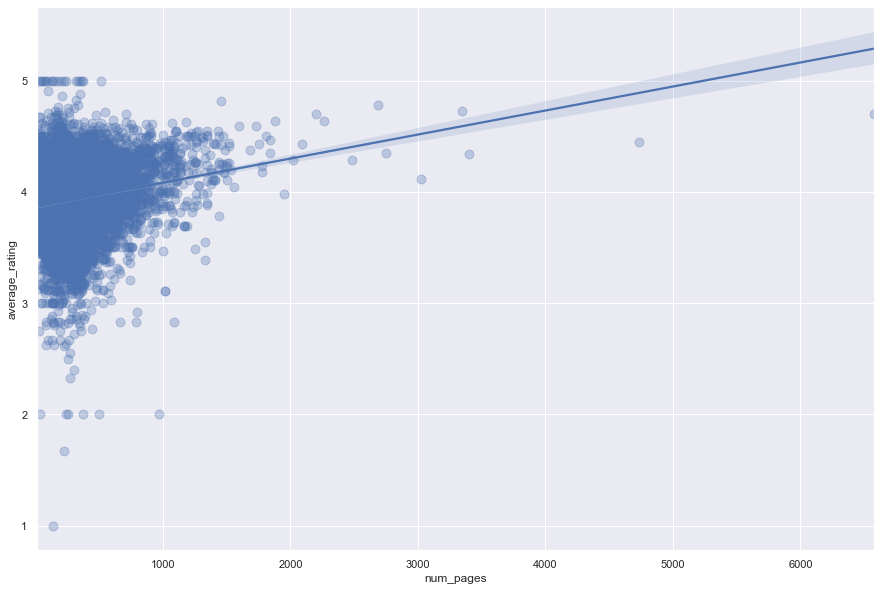

In [9]:
# задаем стиль графика

sns.set_theme(color_codes=True)

# устанавливаем размер графика

fig, ax = plt.subplots(figsize=(15, 10)) 
sns.regplot(x='num_pages', y='average_rating', data = db, scatter_kws={'s':80, 'alpha': 0.3}) 

Интерпретировать график можно так. Точка пересечения линии регрессии с осью **y** находится в районе 3.9. Однако значения для нас это не имеет, так как в этой точке **x** принимает значение 0, а книг с таким количество страниц не бывает. У линии есть наклон, то есть **num_pages** оказывает влияние на оценку. Наклон положительный, то есть чем больше страниц, тем выше оценка. Аналогичные графики можно построить для других признаков, однако здесь это не приводится, чтобы не усложнять анализ.

Ниже продемонстрировано несколько дополнительных техник построени графиков линейной регрессии. Начнем с полиномиальной регрессии.

Text(0.5, 1.0, 'Полиномиальная регрессия')

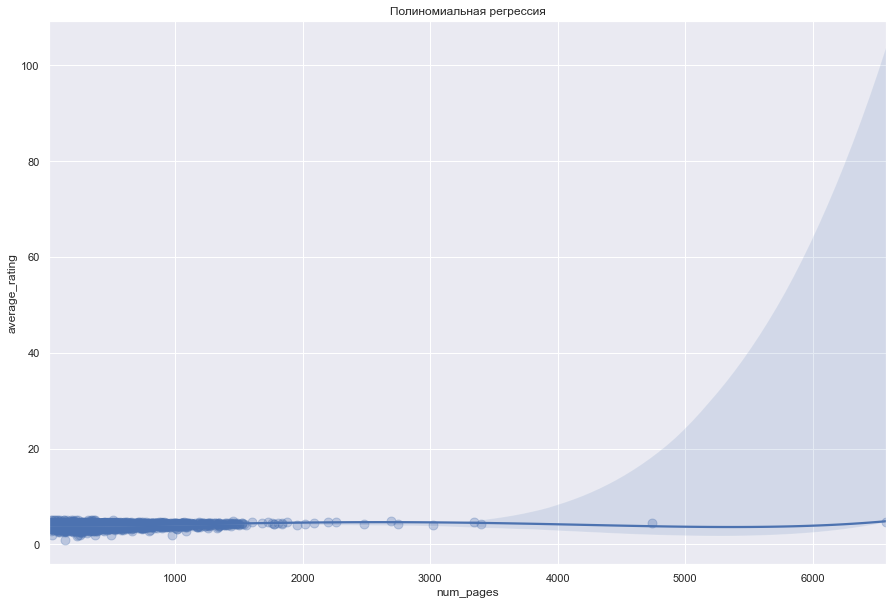

In [10]:
# полиномиальная регрессия

fig, ax = plt.subplots(figsize=(15, 10)) 
sns.regplot(x='num_pages', y='average_rating', data = db, scatter_kws={'s':80, 'alpha': 0.3}, order=4)
plt.title('Полиномиальная регрессия')

Text(0.5, 1.0, 'Линейная регрессия с третьим признаком')

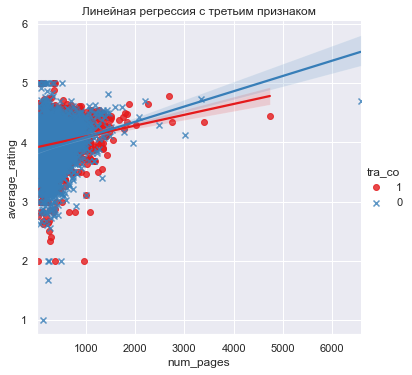

In [11]:
# линейная регрессия с третьим признаком, который задан цветом

sns.lmplot(x='num_pages', y='average_rating', hue="tra_co", data=db, markers=["o", "x"], palette="Set1")
plt.title('Линейная регрессия с третьим признаком')

# Статистический подход

Статистический анализ мы проведем с помощью библиотеки statsmodels. Данная библиотека дает широкий вывод оценок модели, что позволяет проверить допущения линейной регрессии. Также мы сможем удалить выбросы.

## Проверка условий для применения линейной регрессии

Условия применения линейной регрессии описаны выше. Напомним, что часть таких условий проверяется до проведения обучения, а часть - после. В этом разделе мы рассмотрим те условия, которые проверяются до проведения обучения.

### Нормальность распределения

In [12]:
# тест Шапиро на нормальность распределения целевого признака

pg.normality(db['average_rating'])

C:\Users\runaz\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
average_rating,0.973475,1.377196e-40,False


In [13]:
# тест Шапиро на нормальность распределения признака

pg.normality(db['num_pages'])

C:\Users\runaz\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
num_pages,0.771622,0.0,False


In [14]:
# тест Шапиро на нормальность распределения признака

pg.normality(db['ratings_count'])

C:\Users\runaz\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
ratings_count,0.127581,0.0,False


In [15]:
# тест Шапиро на нормальность распределения признака

pg.normality(db['text_reviews_count'])

C:\Users\runaz\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
text_reviews_count,0.180052,0.0,False


In [16]:
# тест Шапиро на нормальность распределения признака

pg.normality(db['len_title'])

C:\Users\runaz\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
len_title,0.820142,0.0,False


In [17]:
# тест Шапиро на нормальность распределения признака

pg.normality(db['polarity'])

C:\Users\runaz\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
polarity,0.610369,0.0,False


In [18]:
# тест Шапиро на нормальность распределения признака

pg.normality(db['subjectivity'])

C:\Users\runaz\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
subjectivity,0.616135,0.0,False


Тест показывает, что признаки не подчиняются нормальному распределению. Однако здесь надо учитывать два момента. Как указывалось выше, если у нас большая выборка, то мы можем полагать, что наши данные все-таки подчинены нормальному распределению, даже если формальные тесты этого не показывают. У нас более 10 тыс. наблюдений, поэтому можем применить указанный принцип. Кроме того, как указывалось выше, в некоторых руководствах сказано, что нормальность распределения и вовсе не является условием применения линейной регрессии.

Если данные не соответствуют нормальному распределению, то их можно попытаться преобразовать. Например, можно преобразовать данные к логарифму. Ниже показан пример этого. Однако для нашего случая мы не будем проводить такое преобразование по следующим причинам. Во-первых, это усложняет интерпретацию. Если мы преобразуем наши данные, то и модель линейной регрессии получим на таких преобразованных значениях. Это означает, что реальные данные, которые мы будем использовать уже после построения модели, нам также потребуется сначала преобразовывать. Во-вторых, учитывая, что нормальность распределения нас особо не заботит (см. выше), буде неэффективным, если мы будем тратить ресурсы на преобразование.

In [21]:
# пример преобразования данных к нормальному распределению

a = 0.001 
num_pages_log = np.log(db['num_pages'] + a) 
num_pages_log.skew()

-0.8575766935290924

### Обнаружение выбросов

В этой части мы исследуем наши данные на выбросы, а далее проведем шкалирование. Выбросы можно определить как такие элементы набора данных, которые не были получены в результате процессов, породивших этот набор данных. Например, рассмотрим количество страниц в книгах. Значение в 300 страниц вполне можно считать таким значением, которе является естественным для книг. А вот значение в 1 млн страниц - нет. 1 млн - это, скорее, остаток на счете богатого человека.

Выбросы могут также быть получены как результат ошибки. Например, если будет указано в средней оценке 45.7, то, возможно, речь на самом деле идет об оценке 4.57.

От выбросов надо отличать шум в данных. Например, если магазин устраивает распродажу, то показатели по отдельным категориям товаров могут быть значительно выше остальных периодов. Однако это не является выбросом.

Ответы на вопросы по обнаружению выбросов можно найти на следующих ресурсах:

1) [Introduction to Anomaly Detection in Python](https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/)

2) [Detection of Outliers](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm)

3) [Anomaly Detection Learning Resources](https://github.com/yzhao062/anomaly-detection-resources)

Важно учитывать, что обнаружение выбросов отличается для одномерных и многомерных данных. Мы, в качестве примера, начнем с одномерных данных, а затем перейдем к многомерным. Общий подход заключается в том, что выбросы определяются в сравнении с известным распределением, как правило нормальным. 

При обработке выбросов надо учитывать, что возможна маскировка выбросов, когда отдельные слишком большие выбросы маскируют выбросы с меньшимим значениями. 

Что делать при обнаружении выбросов?

1) если достоверно известно, что выбросы являются технической ошибкой, то такое значение надо скорректировать (если известно истинное значение), либо удалить;

2) если объяснить причину появления выбросов нельзя, тогда удалять или корректировать выбросы не рекомендуется, однако необходимо применяет робастные тесты и методы машинного обучения. Однако, на практике, выбросы чаще всего именно удаляют;

3) альтернативой является проведение анализа дважды - при наличии выбросов и без выбросов.

Ниже мы покажем, для справки, как обнаружить выбросы в одномерных данных, а затем перейдем к многомерным данным.

**Внимание!** 

Статистический подход не предполагает деление на тренировочный и тестовый наборы. Однако для машинного обучения это обязательно. Поэтому здесь, в этом разделе, мы будем работать с копией наших данных. Другими словами, в разделе с машинным обучением мы будем использовать датасет **db**, но в этом разделе создадим его копию и работать будем с ней.

In [22]:
# набор библиотек, необходимых для обнаружения выбросов

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain, combinations
import scipy.stats as scipystats
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import copy
from sklearn.model_selection import train_test_split
import math
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [23]:
db_stat = db.copy()
db_stat.head()

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,4.57,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,4.49,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,4.42,352,6333,244,2000,4,0,1,40,0.000000,0.000000
3,4.56,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000
4,4.78,2690,41428,164,2000,3,1,1,34,0.000000,0.000000


In [24]:
db_stat.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity
count,10838.000000,10838.000000,1.083800e+04,10838.000000,10838.000000,10838.000000,10838.000000
mean,3.942158,344.175217,1.834788e+04,553.074737,30.258719,0.031306,0.149035
std,0.295387,238.556381,1.138660e+05,2599.330244,22.938807,0.193648,0.270061
min,1.000000,11.000000,0.000000e+00,0.000000,2.000000,-1.000000,0.000000
25%,3.770000,203.000000,1.170000e+02,10.000000,15.000000,0.000000,0.000000
50%,3.960000,304.000000,8.035000e+02,49.000000,22.000000,0.000000,0.000000
75%,4.130000,417.000000,5.226750e+03,248.000000,39.000000,0.000000,0.250000
max,5.000000,6576.000000,4.597666e+06,94265.000000,254.000000,1.000000,1.000000


Заподозрить наличие выбросов можно еще на стадии знакомства с данными. В приведенной таблице видно, например, что максимальное количество страниц равно 6576 при среднем 344. Однако надо учитывать, что выбросы - это именно ошибочные данные. Можем ли мы считать, что значение в 6576 страниц является ошибкой для наших данных? Разве нельзя представить, что есть книга с таким количеством страниц? Можно. В такой ситуации, в принципе, мы можем и не искать выбросы. 

Важно учитывать также следующее. При обнаружении выбросов нас должны интересовать не сами по себе значения, ведь нормальность распределения определяется не только такими значениями, но и плотностью распределения значения.

К вопросу о выбросах можно подойти и более формально. В конечном счете, как нет у нас оснований считать количество страниц просто шумом (какой-то писатель решил написать самую толстую книгу), так и нет оснований полагать, что какому-то писателю это пришло в голову. Поэтому формальная проверка на выбросы будет вполне оправданной. При этом надо помнить, что в любом случае не рекомендуется удалять более 20% данных при анализе выбросов. Следовательно, если мы получим значение ниже этого, то ничто не помешает нам пометить такие данные как выбросы. Возможно, это поможет нам в дальнейшем машинном обучении.

#### Одномерные данные

Начнем с одномерных данных, чтобы лучше разобраться, что такое выбросы. Сначала мы используем визуальный метод обнаружения выбросов. Затем мы используем математический метод, при этом воспользуемся библиотекой papanda.

<AxesSubplot:xlabel='num_pages'>

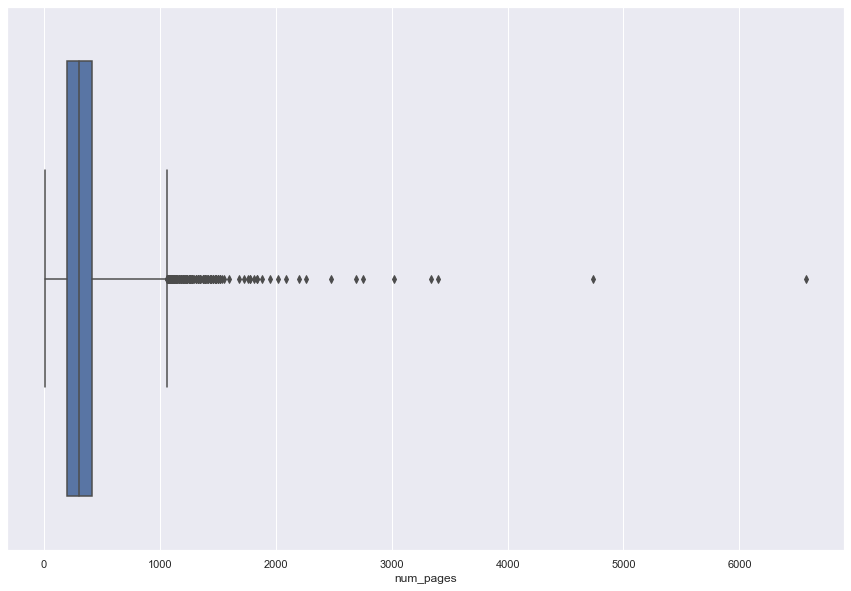

In [25]:
ig, ax = plt.subplots(figsize=[15, 10])

# whis задает межквартильный размах, за границами которого наблюдения квалифицируются как выбросы

sns.boxplot(x=db_stat['num_pages'], fliersize=5, whis=3) 

 В случае с ящиком с усами прмиеняется такое правило: если наблюдения находятся за границей 1,5 межквартильного размаха, то это предполагаемые выбросы, а дальше 3 - однозначные выбросы. Здесь мы видим, что выбросы начинаются в районе 1100 страниц. Мы можем уточнить это значение с помощью теста GESD из библиотеки papanda.

In [26]:
from papanda import gesd

In [27]:
num = list(db_stat['num_pages'])

In [28]:
num = list(db_stat['num_pages'])
gesd.GESD(num, 0.05, 100)

    number_of_outliers   r-stat  l-critical index_of_outliers
0                    0  26.1231    4.577102              6576
1                    1  19.0202    4.577083              4736
2                    2  13.4628    4.577063              3400
3                    3  13.3199    4.577044              3342
4                    4  11.9890    4.577024              3020
..                 ...      ...         ...               ...
95                  95   4.6094    4.575246              1227
96                  96   4.5884    4.575226              1222
97                  97   4.5622    4.575207       Not outlier
98                  98   4.5622    4.575207       Not outlier
99                  99   4.5622    4.575207       Not outlier

[100 rows x 4 columns]


Как видим, 1222 страниц - это выбросы, а вот ниже - уже к выбросам не относится. Далее мы можем удалить из нашего признака **num_pages** выбросы и посмотреть статистики этого признака, очищенного от выбросов. Здесь нас это интересовать не будет, главное, чтобы был понятен общий принцип. Подробнее с библиотекой papanda можно ознакомиться на [GitHub](https://github.com/Ruslan-Nazarov/papanda). Ниже приведены дополнительные замечания, которые носят справочный характер. 

Тест GESD является версией теста Грабса, но отличие состоит в том, что тест применяется итеративно. Мы применяем тест Грабса к одному наблюдени., определяем относится ли оно к выбросам. Затем переходим к следующему и т.д. Алгоритм заключается в том, чтобы:

1) определить контрольную статистику; 
2) вычислить критическое значение. 

Мы должны выбрать предполагаемое количество выбросов. Мы видим, что точек, которые сильно отрываются от остальных данных, две. Но допускается взять большое количество, поэтому возьмем 100. Рекомендуется устанавливать выбросы не более 20%.

Мы видим, что 1216 страниц уже не являются выбросами. Все, что выше этого значения, является выбросами. Это результат аналогичен тому, что мы получили по графику ящик с усами.

Мы исходили из того, что наши данные подчинены нормальному распределению. Теперь предположим, что это другое распределение. В случае с экспоненциальным распределением можно использовать статистику Гринвуда. Если же у нас иные распределения, то мы должны преобразовать его к нормальному, а затем воспользоваться указанным выше тестом GEDS. 

Если данные из логнормального распределения, то натуральный логарифм приводит их к нормальному распределению. Если данные из распределения экстремальных значений типа 1, то применение экпоненты приводит их к экспоненциальному распределению. Аналогично, если данные из распределения Вейбулла, то специальное преобразование приводит данные к экспоненциальному распределению. Для гамма-распределений применение кубического корня приводит к нормальному распределению.

Если преобразование не известно, то нужно привести данные к нормальному распределению с помощью Бокса-Кокса (только положительные значения в данных) или преобразования Джонсона (может применяться с отрицательными значениями в данных).

#### Многомерные данные

Обнаружить выбросы в многомерных данных сложнее. Многомерный выброс - это выброс по любой из компонент наблюдения или многомерных координат. Общий подход заключается в том, что многомерный набор данных преобразуется к одномерным статистикам. Для оценки применяется расстояние Махаланобиса. 

В случае линейной регресссии определяются сначала выбросы, а затем влиятельные наблюдения.

Влиятельные наблюдению определяются через DFFITS и расстояние Кука. В случае обнаружения выбросов может быть применена робастная регрессионная модель, получаемая методом усеченных наименьших квадратов. 

Хорошее описание проблемы выбросов [здесь](https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/).

При этом необходимо учитывать следующее. Если обнаружение выбросов осуществляется в рамках статистического исследования, то это осуществляется на всем наборе данных. Если же обнаружение выбросов необходимо в рамках машинного обучения, то:

1) либо обнаружение выбросов осуществляется только на тренировочном наборе, выбросы удаляются, модель обучается на тренировочных данных без выбросов, а затем тестируется; 
2) либо обнаружение выбросов осуществляется на тренировочном наборе, для чего обучается специальная модель, а затем обученная модель вносит изменения в тренировочные и тестовые данные (на тестовых данных модель нельзя обучать).

Базовый подход следующий: 

1) обнаруживаем выбросы;
2) проверям являются ли обнаруженные выбросы влиятельными наблюдениями, то есть изменяют ли они нашу регрессию. 

In [29]:
import statsmodels.api as sm

a = db_stat[['num_pages', 'ratings_count', 'text_reviews_count', 'len_title', 'polarity', 'subjectivity']] 
a_const= sm.add_constant(a, prepend=False)
model = sm.OLS(db_stat['average_rating'], a_const) 
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     81.40
Date:                Tue, 21 Sep 2021   Prob (F-statistic):          5.03e-100
Time:                        12:09:41   Log-Likelihood:                -1922.3
No. Observations:               10838   AIC:                             3859.
Df Residuals:                   10831   BIC:                             3910.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
num_pages              0.0002   1.17

Мультиколинеарность есть из-за числа оценок и числа обзоров.

In [30]:
# получаем влиятельные наблюдения

influence = results.get_influence() 

# общее описание влиятельных наблюдений

pd.Series(influence.hat_matrix_diag).describe() 

count    10838.000000
mean         0.000646
std          0.003318
min          0.000101
25%          0.000172
50%          0.000240
75%          0.000496
max          0.192814
dtype: float64

In [31]:
# табличное представление

inf_sum = influence.summary_frame() 
print(inf_sum.head(10))

   dfb_num_pages  dfb_ratings_count  dfb_text_reviews_count  dfb_len_title  \
0       0.009225           0.208361               -0.121834       0.011115   
1       0.010834           0.117202               -0.066370       0.007889   
2      -0.000051          -0.000250               -0.000443       0.008973   
3      -0.002347           0.192170               -0.088000       0.016550   
4       0.109983           0.006762               -0.008425      -0.000589   
5       0.007051          -0.000260                0.000313      -0.020415   
6       0.068380          -0.000383               -0.000571      -0.003175   
7       0.019448          -0.000508                0.000030       0.010792   
8       0.020057           0.017347               -0.008520      -0.000651   
9      -0.005678          -0.001788                0.001585       0.004676   

   dfb_polarity  dfb_subjectivity  dfb_const   cooks_d  standard_resid  \
0     -0.010861          0.005218  -0.015335  0.008238        1.148

В этой таблице мы видим:

**cooks_d** - расстояние Кука

**standard_resid** - стандартизированные остатки

**hat_diag** - кредитное плечо, то есть влияние конкретного значения на регрессионную кривую

**dffits_internal**

**student_resid** - остатки по Стьюденту

**dffits** - различие приближений

Сейчас мы должны объединить наш исходный датасет и полученную выше таблицу.

Также здесь мы следуем ГОСТу Р ИСО 16269-4-2017

См. [также](https://www.datasklr.com/ols-least-squares-regression/diagnostics-for-leverage-and-influence?rq=outliers)

In [32]:
db_stat_inf = pd.concat([db_stat, inf_sum], axis = 1)
db_stat_inf = db_stat_inf.rename(columns={'hat_diag': 'leverage'})
db_stat_inf.head()

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,...,dfb_len_title,dfb_polarity,dfb_subjectivity,dfb_const,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,4.57,652,2095690,27591,2000,3,1,1,39,-0.166667,...,0.011115,-0.010861,0.005218,-0.015335,0.008238,1.148201,0.041907,0.240137,1.148218,0.240140
1,4.49,870,2153167,29221,2000,3,1,1,42,0.000000,...,0.007889,0.000916,-0.002959,-0.012689,0.002705,0.648737,0.043059,0.137613,0.648720,0.137610
2,4.42,352,6333,244,2000,4,0,1,40,0.000000,...,0.008973,-0.000445,-0.010016,0.004291,0.000056,1.604048,0.000153,0.019853,1.604164,0.019854
3,4.56,435,2339585,36325,2000,2,1,1,41,0.000000,...,0.016550,0.001690,-0.006438,-0.013099,0.008824,1.154355,0.044302,0.248537,1.154373,0.248541
4,4.78,2690,41428,164,2000,3,1,1,34,0.000000,...,-0.000589,0.001725,-0.002549,-0.065316,0.001761,1.160272,0.009075,0.111034,1.160291,0.111036


Теперь мы должны найти пересечение предполагаемых выбросов и значений с высоким значением плеча, то есть влияния на модель регрессии.

In [33]:
outlier_lev = db_stat_inf[(db_stat_inf['leverage'].abs() > ((2*6)+2)/10838) & (db_stat_inf['student_resid'].abs() > 2)]

Поясним, что здесь происходит. 

(db_stat_inf['student_resid'].abs() > 2) - это предполагаемые выбросы по целевому признаку

(db_stat_inf['leverage'].abs() > ((2*6)+2)/10838) - это предполагаемые выбросы по признакам

Далее мы должны найти влиятельность таких выбросов. Для этого используют либо растояние Кука, либо DFFITS.

In [34]:
# выбросы по целевому признаку (или Y)

db_stat_inf[db_stat_inf['student_resid'].abs() > 2]

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,...,dfb_len_title,dfb_polarity,dfb_subjectivity,dfb_const,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
24,4.53,218,19822,46,2000,4,1,0,42,0.000000,...,0.013622,-0.000885,-0.013621,0.012078,0.000126,2.068010,0.000207,0.029731,2.068323,0.029736
58,3.25,192,55,5,2000,4,0,0,39,0.000000,...,-0.012363,0.000867,0.014749,-0.016596,0.000148,-2.320277,0.000192,-0.032185,-2.320747,-0.032191
70,4.59,192,26153,102,2000,2,0,0,60,0.000000,...,0.031962,-0.001964,-0.018672,0.005065,0.000271,2.206957,0.000390,0.043575,2.207351,0.043583
74,3.34,205,174,16,2000,2,0,0,62,0.000000,...,-0.032641,0.001989,0.018501,-0.003045,0.000254,-2.127810,0.000393,-0.042173,-2.128156,-0.042180
94,2.99,360,411,65,2000,1,0,0,25,0.000000,...,0.003286,-0.000301,0.015364,-0.019854,0.000192,-3.276350,0.000125,-0.036653,-3.277824,-0.036669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,3.16,96,29,2,1990,4,0,0,51,0.000000,...,-0.028021,0.001932,0.020226,-0.017874,0.000335,-2.618656,0.000342,-0.048425,-2.619365,-0.048438
10715,3.39,718,13716,393,2000,3,0,1,12,0.000000,...,0.014917,-0.001419,0.005988,0.000579,0.000248,-2.097728,0.000394,-0.041627,-2.098058,-0.041633
10790,3.14,64,7,1,1990,4,0,0,11,0.000000,...,0.016560,-0.000574,0.009087,-0.042089,0.000263,-2.474493,0.000300,-0.042866,-2.475078,-0.042876
10807,3.29,482,14,2,2000,1,0,0,20,0.255682,...,0.022549,-0.015907,-0.037544,-0.003277,0.000423,-2.304750,0.000557,-0.054408,-2.305209,-0.054419


In [35]:
y_out = db_stat_inf[db_stat_inf['student_resid'].abs() > 2]
y_out

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,...,dfb_len_title,dfb_polarity,dfb_subjectivity,dfb_const,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
24,4.53,218,19822,46,2000,4,1,0,42,0.000000,...,0.013622,-0.000885,-0.013621,0.012078,0.000126,2.068010,0.000207,0.029731,2.068323,0.029736
58,3.25,192,55,5,2000,4,0,0,39,0.000000,...,-0.012363,0.000867,0.014749,-0.016596,0.000148,-2.320277,0.000192,-0.032185,-2.320747,-0.032191
70,4.59,192,26153,102,2000,2,0,0,60,0.000000,...,0.031962,-0.001964,-0.018672,0.005065,0.000271,2.206957,0.000390,0.043575,2.207351,0.043583
74,3.34,205,174,16,2000,2,0,0,62,0.000000,...,-0.032641,0.001989,0.018501,-0.003045,0.000254,-2.127810,0.000393,-0.042173,-2.128156,-0.042180
94,2.99,360,411,65,2000,1,0,0,25,0.000000,...,0.003286,-0.000301,0.015364,-0.019854,0.000192,-3.276350,0.000125,-0.036653,-3.277824,-0.036669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,3.16,96,29,2,1990,4,0,0,51,0.000000,...,-0.028021,0.001932,0.020226,-0.017874,0.000335,-2.618656,0.000342,-0.048425,-2.619365,-0.048438
10715,3.39,718,13716,393,2000,3,0,1,12,0.000000,...,0.014917,-0.001419,0.005988,0.000579,0.000248,-2.097728,0.000394,-0.041627,-2.098058,-0.041633
10790,3.14,64,7,1,1990,4,0,0,11,0.000000,...,0.016560,-0.000574,0.009087,-0.042089,0.000263,-2.474493,0.000300,-0.042866,-2.475078,-0.042876
10807,3.29,482,14,2,2000,1,0,0,20,0.255682,...,0.022549,-0.015907,-0.037544,-0.003277,0.000423,-2.304750,0.000557,-0.054408,-2.305209,-0.054419


In [36]:
# растояние Кука

cutoff=(db_stat_inf.loc[:,"cooks_d"].mean())*3
cutoff

0.00034190977483844454

In [37]:
outlier1 = y_out[abs(y_out["cooks_d"]) > cutoff]
print(outlier1)

       average_rating  num_pages  ratings_count  text_reviews_count decade  \
244              3.09        571           1601                 284   2000   
498              2.80         80              5                   0   1980   
516              2.83        664              0                   0   2000   
517              3.50        854              0                   0   2000   
564              2.67        196              9                   2   2000   
...               ...        ...            ...                 ...    ...   
10657            3.20        240            207                  28   2000   
10660            4.70        712            404                  30   1980   
10663            4.67         29              3                   0   2000   
10807            3.29        482             14                   2   2000   
10808            2.33        272              3                   0   2000   

      quarter tra_co multivolume  len_title  polarity  ...  dfb

In [38]:
# выбросы по признакам (или X)

x_out = db_stat_inf[db_stat_inf['leverage'].abs() > ((2*6)+2)/10838]
x_out

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,...,dfb_len_title,dfb_polarity,dfb_subjectivity,dfb_const,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,4.57,652,2095690,27591,2000,3,1,1,39,-0.166667,...,0.011115,-0.010861,0.005218,-0.015335,0.008238,1.148201,0.041907,0.240137,1.148218,0.240140
1,4.49,870,2153167,29221,2000,3,1,1,42,0.000000,...,0.007889,0.000916,-0.002959,-0.012689,0.002705,0.648737,0.043059,0.137613,0.648720,0.137610
3,4.56,435,2339585,36325,2000,2,1,1,41,0.000000,...,0.016550,0.001690,-0.006438,-0.013099,0.008824,1.154355,0.044302,0.248537,1.154373,0.248541
4,4.78,2690,41428,164,2000,3,1,1,34,0.000000,...,-0.000589,0.001725,-0.002549,-0.065316,0.001761,1.160272,0.009075,0.111034,1.160291,0.111036
6,4.73,3342,28242,808,2000,3,0,1,24,0.000000,...,-0.003175,0.001249,-0.000192,-0.040173,0.000674,0.562016,0.014709,0.068669,0.561998,0.068667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10774,4.27,158,839,65,2000,3,0,1,98,0.800000,...,0.024328,0.034074,-0.014877,-0.005286,0.000283,0.902376,0.002424,0.044479,0.902368,0.044479
10775,4.34,175,675,61,2000,1,0,1,113,0.066667,...,0.039547,-0.001199,-0.007372,-0.011938,0.000250,1.114341,0.001405,0.041792,1.114353,0.041792
10780,4.00,112,1,0,2000,3,1,0,84,0.800000,...,0.001238,0.002666,0.001418,-0.000469,0.000003,0.090549,0.002181,0.004233,0.090545,0.004233
10787,3.76,101,328,43,2000,2,1,0,36,-1.000000,...,0.000712,0.023770,-0.017601,-0.001605,0.000103,-0.374593,0.005124,-0.026882,-0.374578,-0.026881


In [39]:
outlier2 = x_out[abs(x_out["cooks_d"]) > cutoff]
print(outlier2)

       average_rating  num_pages  ratings_count  text_reviews_count decade  \
0                4.57        652        2095690               27591   2000   
1                4.49        870        2153167               29221   2000   
3                4.56        435        2339585               36325   2000   
4                4.78       2690          41428                 164   2000   
6                4.73       3342          28242                 808   2000   
...               ...        ...            ...                 ...    ...   
10586            4.43        304            413                   5   2000   
10610            4.35        681           2276                 170   1990   
10632            4.34       3400              6                   1   1980   
10636            3.58        320            241                  30   2000   
10720            3.60        400           2777                 119   2000   

      quarter tra_co multivolume  len_title  polarity  ...  dfb

Итак, мы получили два набора данных - с выбросами по целевому признаку и с выбросами по признакам. Мы удалим выбросы по признакам и построим нашу линейную регрессию.

In [40]:
db_stat

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,4.57,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,4.49,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,4.42,352,6333,244,2000,4,0,1,40,0.000000,0.000000
3,4.56,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000
4,4.78,2690,41428,164,2000,3,1,1,34,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
10833,4.06,512,156,20,2000,4,1,1,48,0.000000,0.000000
10834,4.08,635,783,56,1980,4,0,0,27,0.700000,0.800000
10835,3.96,415,820,95,1990,3,0,1,14,0.000000,0.000000
10836,3.72,434,769,139,2000,1,0,0,11,-0.400000,0.600000


In [41]:
db_stat = db_stat.drop(outlier2.index)
db_stat

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
2,4.42,352,6333,244,2000,4,0,1,40,0.000000,0.000000
5,3.74,152,19,1,2000,2,0,0,87,-0.166667,0.166667
7,4.38,815,3628,254,2000,4,0,1,68,0.050000,0.700000
8,4.38,815,249558,4080,2000,2,0,1,46,0.000000,1.000000
9,4.22,215,4930,460,2000,3,0,1,37,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
10833,4.06,512,156,20,2000,4,1,1,48,0.000000,0.000000
10834,4.08,635,783,56,1980,4,0,0,27,0.700000,0.800000
10835,3.96,415,820,95,1990,3,0,1,14,0.000000,0.000000
10836,3.72,434,769,139,2000,1,0,0,11,-0.400000,0.600000


### Шкалирование данных

In [42]:
# список количественных признаков

col_names = ['num_pages', 'ratings_count', 'text_reviews_count', 'len_title', 'polarity', 'subjectivity'] 

# создаем датафрейм с количественными признаками

features = db_stat[col_names] 

# вызываем и обучаем шкалировщик

scaler = StandardScaler().fit(features.values) 

# преобразуем наши данные

features = scaler.transform(features.values) 

# применяем результаты

db_stat[col_names] = features 

In [43]:
# наши данные после шкалирования

db_stat.head()

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
2,4.42,0.058897,-0.114100,-0.128726,2000,4,0,1,0.463128,-0.159079,-0.540469
5,3.74,-0.882438,-0.212215,-0.279567,2000,2,0,0,2.603106,-1.087512,0.095796
7,4.38,2.238087,-0.156134,-0.122518,2000,4,0,1,1.738008,0.119451,2.131843
8,4.38,2.238087,3.665457,2.252456,2000,2,0,1,0.736316,-0.159079,3.277119
9,4.22,-0.585918,-0.135902,0.005355,2000,3,0,1,0.326533,-0.159079,-0.540469


In [44]:
db_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10606 entries, 2 to 10837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      10606 non-null  float64
 1   num_pages           10606 non-null  float64
 2   ratings_count       10606 non-null  float64
 3   text_reviews_count  10606 non-null  float64
 4   decade              10606 non-null  object 
 5   quarter             10606 non-null  object 
 6   tra_co              10606 non-null  object 
 7   multivolume         10606 non-null  object 
 8   len_title           10606 non-null  float64
 9   polarity            10606 non-null  float64
 10  subjectivity        10606 non-null  float64
dtypes: float64(7), object(4)
memory usage: 994.3+ KB


## Построение простой линейной регрессии

In [45]:
# пример построения линейной регрессии с одним признаком

a = db_stat['num_pages'] 
a_const= sm.add_constant(a, prepend=False)
model = sm.OLS(db_stat['average_rating'], a_const) 
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     284.5
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           5.09e-63
Time:                        12:10:27   Log-Likelihood:                -1748.5
No. Observations:               10606   AIC:                             3501.
Df Residuals:                   10604   BIC:                             3516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_pages      0.0467      0.003     16.868      0.0

Данный вывод может испугать из-за обилия статистик. Однако в нем можно разобраться. Пойдем с верхнего левого прямоугольника.

**Dep. Variable** - целевой признак, в нашем случае это average_rating;

**Model** - это применяемая нами модель;

**Method** - это метод построения линейной регрессии;

**Date**, **Time** - время создания модели;

**No. Observation** - это количество элементов (строк, наблюдений) в данных;

**Df Residuals** - это остатки;

**R-squared** - это коэффициент детерминации, то есть количество дисперсии, которая объясняется нашей моделью. В данном случае у нас это 0.030. Этот коэффициент представляет собой квадрат коэффициента корреляции между реальными и предсказанными значениями;

**Adj. R-squared** -  тоже самое, но с учетом специальной поправки;

**F-statistic** - позволяет ответить на вопрос: лучше ли наша модель, чем модель, в которой все коэффициенты равны 0. Наша F-статистика равна 3 при p-value < 0.05, то есть нулевую гипотезу о случайности мы можем отвергнуть; 

**Prob (F-statistic)** - вероятность получить значение случайно, у нас низкая. Это означает следующее: если вероятность ниже альфа-уровня, например 0.05, то наша модель лучше предсказывает целевой признак, чем модель, в которой все коэффициенты равны нулю. Обратно: если вероятность выше 0.05, то наша модель хуже предсказывает целевой признак, чем модель, в которой все коэффициенты равны нулю;

**coef** - это коэффициент в формуле линейной регрессии, на который умножается значение признака, коэффициент наклона. У нас это 0.0002, то есть коэффициент незначим, мы можем предсказать значения просто по точке пересечения;

**std err** - это то, насколько фактические значения отличаются от регрессионной прямой. Другими словами, это усредненная ошибка предсказания оценки книги по количеству страниц;

**t** - статистика показывает важность переменных в модели и получается в результате деления регрессионного коэффициента для признака на стандартную ошибку коэффициента. Чем выше t статистика и ниже p-значение, тем более значим признак;

**P>|t|** - вероятность получить значение случайно;

**[0.025      0.975]** - доверительные интервалы для коэффициента.

Нижняя часть вывода - это проверка на соблюдение условий для применения линейной регрессии. Здесь обследуются остатки. Если условия по остаткам не выполняются, то мы не можем принять результаты линейной регрессии.

**Omnibus** - это тест на нормальное распределение остатков. Вероястность (Prob(Omnibus)) должна стремиться к 1, чтобы мы могли сказать, что остатки распределены нормально. В нашем случае это не выполняется. 

**Skew** - это перекос графика распределения остатков. В идеале перекоса не должно быть, а значит значение должно быть 0. У нас это не так, есть левосторонний перекос.

**Kurtosis** - это показатель "остроты" пика графика распределения остатков. 

**Durbin-Watson** - тест на гомоскедастичность остатков, статистика может принимать значения от 0 до 4, значение 2 показывает независимость остатков. У нас значение 1.517

**Jarque-Bera** это еще один тест на нормальность. 

**Cond. No.** - тест на мультиколлинеарность. 

In [46]:
# линейная регрессия с двумя признаками

X = db_stat[['num_pages', 'ratings_count']]
y = db_stat['average_rating']
X = sm.add_constant(X)
model_mult = sm.OLS(y, X)
results2 = model_mult.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     152.9
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.37e-66
Time:                        12:10:27   Log-Likelihood:                -1738.1
No. Observations:               10606   AIC:                             3482.
Df Residuals:                   10603   BIC:                             3504.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9421      0.003   1423.998

Это пример множественной линейной регрессии. Требуются теже условия плюс мульколлинеарность. Это можно сделать с помощью коэффициентов корреляции, а можно использовать Variance Inflation Factor, если у нас 3 и более признака. У нас меньше, но мы воспользуемся этим методом для демонстрации.

In [47]:
# дополнительный инструмент для проверки

from statsmodels.stats.outliers_influence import variance_inflation_factor 

# с помощью этой библиотеки можно преобразовать данные в формат, который понятен statsmodel

import patsy 

x = patsy.dmatrix("num_pages + ratings_count", data = db)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif["Features"] = x.design_info.term_names
vif

,VIF Factor,Features
0,3.095572,Intercept
1,1.000906,num_pages
2,1.000906,ratings_count


Первая строка в этом выводе должна быть проигнорирована. Если в других строках **VIF** больше 10, то у нас мультиколлинеарность. Однако это не так. Вывод: **ratings_count** помогает улучшить модель. Оставляем **num_pages**,  **ratings_count**.

В нашем примере количественные признаки не ограничиваются только количеством страниц и количеством оценок. У нас есть также следующие признаки: **text_reviews_count**, **len_title**, **polarity**, **subjectivity**. Если у нас более одного признака, то встает вопрос о стратегии обучения. Мы можем:

1) добавить все признаки сразу, затем удалять по одному и смотреть, как изменятся метрики;
2) добавлять признаки по одному, и смотреть, как изменяются метрики.

В данном случае воспользуемся первой стратегией.

In [48]:
X = db_stat[['num_pages', 'text_reviews_count', 'ratings_count', 'len_title', 'polarity', 'subjectivity']]
y = db_stat['average_rating']
X = sm.add_constant(X)
model_mult = sm.OLS(y, X)
results2 = model_mult.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     82.18
Date:                Tue, 21 Sep 2021   Prob (F-statistic):          6.21e-101
Time:                        12:10:27   Log-Likelihood:                -1647.8
No. Observations:               10606   AIC:                             3310.
Df Residuals:                   10599   BIC:                             3361.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9421      0

Обратите внимание на второе примечание. Модель сигнализирует нам, что возможна мультиколлинеарность. Это оправданно. Из нашего статистического анализа мы знаем, что **text_reviews_count** и **ratings_count** имеют сильную корреляцию.

Обратите внимание, что в нашей лучшей модели **text_reviews_count** имеет отрицательный коэффициент. Здесь можно выдвинуть предположение, что увеличение количества отзывов уменьшает оценку. Теперь давайте посмотрим еще несколько техник.

In [49]:
# линейная регрессия с категориальным признаком

import statsmodels.formula.api as smf
sm.OLS.from_formula
mod = smf.ols('average_rating ~ C(decade)', data=db_stat) 
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.078
Date:                Tue, 21 Sep 2021   Prob (F-statistic):            0.00306
Time:                        12:10:28   Log-Likelihood:                -1878.2
No. Observations:               10606   AIC:                             3772.
Df Residuals:                   10598   BIC:                             3831.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.9736      0.06

In [50]:
# линейная регрессия с взаимодействием между признаками

mod = smf.ols('average_rating ~ len_title*num_pages', data=db_stat) 
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     152.4
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.02e-96
Time:                        12:10:28   Log-Likelihood:                -1665.0
No. Observations:               10606   AIC:                             3338.
Df Residuals:                   10602   BIC:                             3367.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.9421    

# Машинное обучение

Сейчас мы переходим к машинному обучению. Чтобы применять машинное обучение надо ответить на несколько вопросов.

1) Какую модель выбрать? У нас это линейная регрессия (возможно также применение робастной линейной регрессии,полиномиальной, а также применение регуляризации).

2) Требуется ли дополнительная подготовка данных для выбранной модели? Например, мы можем добавить дополнительные признаки в ручном режиме или автоматически. Или нам придется стандартизировать наши данные.

3) Какие параметры модели мы будем настраивать и как? Будем использоват решетчатый поиск с кросс-валидацией.

4) Что будет нашей оценкой качества модели? MSE и R2.

5) Как мы можем получить предсказания по новым данным?


Порядок действий такой: 

1) задаем модель линейной регрессии; 

2) разделяем данные на тренировочный и тестовый наборы; 

3) подготавливаем данные (возможно с применением метода Pipeline); 

4) тренируем модель с настройкой параметров и оценкой; 

5) выбираем лучшую модель; 

6) проводим проверку на тестовом наборе; 

7) применяем для новых данных.

Важно помнить следующие два обстоятельства: 

1) всегда надо стремиться найти самую простую и эффективную модель. Поэтому начинать стоит с базовой. 

2) Когда мы готовим наши данные для машинного обучения, мы можем добавлять признаки, очищать их, модифицировать до разделения на тренировочный и тестовый набор или после. До разделения мы можем применять только нематематические методы, которым не требуются расчеты на всем датафрейме. Все математические методы, которые требуют расчетов, надо применять только после разделения на тренировочный и тестовый наборы, причем только на тренировочном (с последующим применением результатов и к тестовому).

Мы должны преобразовать наши данные. Это можно сделать для количественных и категориальных отдельно, а можно воспользоваться специальным инструментом Pipeline. Мы рассмотрим оба варианта для лучшего понимания.

Важно помнить, что мы должны удалить выбросы и прошкалировать наши данные. Выбросы мы удалим иначе, чем это было сделано в разделе Статистический анализ. 

Здесь надо отдельно подчеркнуть, что желательно давать подробное наименование для наших переменных.

## Создание данных

In [51]:
db.head()

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,4.57,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,4.49,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,4.42,352,6333,244,2000,4,0,1,40,0.000000,0.000000
3,4.56,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000
4,4.78,2690,41428,164,2000,3,1,1,34,0.000000,0.000000


In [52]:
X = db.drop('average_rating', axis = 1)
y = db['average_rating']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

## Подготовка данных без Pipeline

### Заполнение пропусков

Заполнение пропусков здесь приводится для примера, так как в наших данных пропусков нет.

In [54]:
"""

# все нижеследующее мы должны проводить только на обучающем наборе

# в наших данных нет пропусков, но в демонстрационных целях мы это предположим
# SimpleImputer - это инструмент для заполнения пропусков

imputer = SimpleImputer(strategy='median') 

# оставляем только количественные признаки

X_train_1 = X_train.select_dtypes(include=[np.number]) 

#обучаем для заполнения пропусков

imputer.fit(X_train_1) 

# заполняем пропуски и возвращаемся к формату датафрейма

X_1 = imputer.transform(X_train_1) 
X_train = pd.DataFrame(X_1, columns=X_train_1.columns, index=booksX_train.index) 

"""

"\n\n# все нижеследующее мы должны проводить только на обучающем наборе\n# в наших данных нет пропусков, но в демонстрационных целях мы это предположим\n# SimpleImputer - это инструмент для заполнения пропусков\n\nimputer = SimpleImputer(strategy='median') \n\n# оставляем только количественные признаки\n\nX_train_1 = X_train.select_dtypes(include=[np.number]) \n\n#обучаем для заполнения пропусков\n\nimputer.fit(X_train_1) \n\n# заполняем пропуски и возвращаемся к формату датафрейма\n\nX_1 = imputer.transform(X_train_1) \nX_train = pd.DataFrame(X_1, columns=X_train_1.columns, index=booksX_train.index) \n\n"

### Удаление выбросов

Выполнить удаление выбросов можно с помощью как sklearn, так и специализированной библиотеки Pyod. Покажем оба подхода. Как и всегда, надо помнить, что fit делается только на обучающих данных. Другими словами, нельзя допускать утечку признака. Здесь мы удалим выбросы, хотя это и не рекомендуется делать.

#### Поиск выбросов с помощью scikit-learn

In [55]:
"""

# приводится для примера

from sklearn.ensemble import IsolationForest

X = db_copy.drop(['title', 'average_rating', 'language_code', 'decade', 'quarter', 'tra_co', 'multivolume'], axis=1) #признаки
y = db_copy['average_rating'] #целевой признак
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #разделям данные на обучающий и тестовый наборы

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
mask = yhat != -1

X_train_c = X_train.copy()
y_train_c = y_train.copy()
X_train_c['yhat'] = yhat
X_train_c = X_train_c[mask]
y_train_c = y_train_c.loc[X_train_c.index]
X_train_c = X_train_c.drop('yhat', axis=1)

yhat1 = iso.predict(X_test)

mask = yhat1 != -1
X_test_c = X_test.copy()
y_test_c = y_test.copy()
X_test_c['yhat'] = yhat1
X_test_c = X_test_c[mask]
y_test_c = y_test_c.loc[X_test_c.index]
X_test_c = X_test_c.drop('yhat', axis=1)

"""

"\n\n# приводится для примера\n\nfrom sklearn.ensemble import IsolationForest\n\nX = db_copy.drop(['title', 'average_rating', 'language_code', 'decade', 'quarter', 'tra_co', 'multivolume'], axis=1) #признаки\ny = db_copy['average_rating'] #целевой признак\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #разделям данные на обучающий и тестовый наборы\n\niso = IsolationForest(contamination=0.1)\nyhat = iso.fit_predict(X_train)\nmask = yhat != -1\n\nX_train_c = X_train.copy()\ny_train_c = y_train.copy()\nX_train_c['yhat'] = yhat\nX_train_c = X_train_c[mask]\ny_train_c = y_train_c.loc[X_train_c.index]\nX_train_c = X_train_c.drop('yhat', axis=1)\n\nyhat1 = iso.predict(X_test)\n\nmask = yhat1 != -1\nX_test_c = X_test.copy()\ny_test_c = y_test.copy()\nX_test_c['yhat'] = yhat1\nX_test_c = X_test_c[mask]\ny_test_c = y_test_c.loc[X_test_c.index]\nX_test_c = X_test_c.drop('yhat', axis=1)\n\n"

#### Использование библиотеки Pyod

In [56]:
from pyod.models.knn import KNN

In [57]:
clf = KNN(contamination=0.02, n_neighbors=5)
clf.fit(X_train)
out = clf.predict(X_train)
X_train['out'] = out

<ipython-input-57-f68707bddc0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['out'] = out


In [58]:
out1 = clf.predict(X_test)
X_test['out'] = out1

<ipython-input-58-a58083169563>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['out'] = out1


In [59]:
# в дальнейшем обучение проводится уже на этих данных

X_train = X_train[X_train['out'] != 1]
X_test = X_test[X_test['out'] != 1]

y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

In [60]:
'''

X_train = X_train.drop('out', axis = 1)
X_test = X_test.drop('out', axis = 1)

y_train = y_train.drop('out', axis = 1)
y_test = y_test.drop('out', axis = 1)
'''

"\n\nX_train = X_train.drop('out', axis = 1)\nX_test = X_test.drop('out', axis = 1)\n\ny_train = y_train.drop('out', axis = 1)\ny_test = y_test.drop('out', axis = 1)\n"

#### Шкалирование

In [61]:
# обучение проводим на тренировочном наборе, обученную модель применяем как к тренировочному, так и тестововму набору
# список количественных признаков

col_names = ['num_pages', 'ratings_count', 'text_reviews_count', 'len_title', 'polarity', 'subjectivity'] 

# создаем датафрейм с количественными признаками

features = X_train[col_names] 

# вызываем и обучаем шкалировщик

scaler = StandardScaler().fit(features.values) 

# преобразуем наши данные

features = scaler.transform(features.values) 

# применяем результаты

X_train[col_names] = features 

# применяем к тестовому набору

features_test = X_test[col_names]

features_test = scaler.transform(features_test.values) 

X_test[col_names] = features_test

#### Кодирование категориальных данных

Существует множество способов кодирования категориальных данных. Как правило, они все так или иначе связаны с частотностью появления категории. Такие способы мы рассмотрим в следующией главе. Здесь же возьмем простой способ.

In [62]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

### Подготовка данных с Pipline

Применение Pipline является распространенной практикой. Однако стоит заметить, что этот инструмент по сути скрывает от нас трансформацию данных. Поэтому применять его можно, если вы уверены в конечном результате применяемых инструментов. Ниже приведен код только для примера.

In [63]:
"""
# приводится для примера

# оставляем только количественные признаки
# проводим импутацию признаков и их стандартизацию

col_num = books.select_dtypes(include=[np.number]) 
num_pipline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())])

# разделяем данные на числовые и категориальные

num_atrib = list(col_num) 
cat_atrib = ['tra_co', 'decade', 'quarter', 'multivolume'] 


# обратите внимание, что применяемый инструмент мы можем указать непосредственно в трубе, например ohe

full_pipe = ColumnTransformer([
    ('num', num_pipline, num_atrib),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_atrib)
]) 

X_train_prepared = full_pipe.fit_transform(X_train)

"""

"\n# приводится для примера\n\n# оставляем только количественные признаки\n# проводим импутацию признаков и их стандартизацию\n\ncol_num = books.select_dtypes(include=[np.number]) \nnum_pipline = Pipeline([('imputer', SimpleImputer(strategy='median')),\n                        ('scaler', StandardScaler())])\n\n# разделяем данные на числовые и категориальные\n\nnum_atrib = list(col_num) \ncat_atrib = ['tra_co', 'decade', 'quarter', 'multivolume'] \n\n\n#обратите внимание, что применяемый инструмент мы можем указать непосредственно в трубе, например ohe\n\nfull_pipe = ColumnTransformer([\n    ('num', num_pipline, num_atrib),\n    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_atrib)\n]) \n\nX_train_prepared = full_pipe.fit_transform(X_train)\n\n"

In [64]:
X_train

,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity,out,decade_1940,decade_1950,decade_1960,...,decade_2000,decade_2010,quarter_1,quarter_2,quarter_3,quarter_4,tra_co_0,tra_co_1,multivolume_0,multivolume_1
7591,-0.622539,-0.211015,-0.177951,0.553345,-0.168926,-0.547261,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
4286,1.405421,-0.346762,-0.391941,0.943820,-0.562278,0.671065,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
4231,-0.430921,-0.204420,-0.394473,-0.574695,-0.168926,-0.547261,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2702,0.423377,-0.362815,-0.355221,1.247523,0.355542,0.577348,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
6390,-0.558667,1.859759,0.061364,0.596731,-0.168926,-0.547261,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,-0.047685,-0.347672,-0.310903,-0.140833,-0.168926,-0.547261,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
1998,-0.414953,-0.312564,-0.337494,0.770276,-0.168926,-0.547261,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
6933,-0.239303,-0.271180,-0.170353,4.024237,-2.266801,1.701956,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2848,-0.674436,-0.373821,-0.403337,-0.661467,-0.168926,-0.547261,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


## Обучение

In [65]:
# на оси x (или осях, если несколько признаков) мы откладываем признаки, на оси y целевой признак

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) 

LinearRegression()

## Оценка

In [66]:
# оценка на тренировочных данных

some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

# эти оценки получит наша книга

print("Прогноз:", lin_reg.predict(some_data)) 

Прогноз: [3.91089723 3.98430226 3.91044594 3.98080517 3.99002402]


In [67]:
# а это реальные данные

print('Прогноз:', list(some_labels)) 

Прогноз: [4.3, 4.41, 4.16, 4.22, 4.63]


In [69]:
# оценка на тестовых данных

from sklearn.metrics import mean_squared_error

# проверка нашей модели с помощью MSE на обучающих данных

X_predict = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, X_predict)
lin_mse

0.08256348121154408

Дополнительно мы можем также использовать коэффициент детерминации R2 для оценки нашей модели.

Коэффициент детерминации в идеале должен быть 1. Данный коэффициент показывает, сколько процентов дисперсии может объяснить наша модель. MSE показывает ошибку между предсказанным значением и фактическим. 

In [70]:
# проверка на случайных данных

from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_predict_dummy_mean = dummy.predict(X_train)

dummy.score(y_predict_dummy_mean, y_train) 

0.0

## Тонкая настройка модели

Если наша модель нас не устраивает, то мы можем дополнительно ее настроить. Общие замечания также смотрите в приложении. В общем же надо понимать, что настройка проводится по тем направлениям, которые наиболее чувствителны для обучения:

1) признаков слишком много - и мы можем уменьшить размерность наших данных;
2) параметры подобраны неправильно - и мы можем перебрать наборы параметров;
3) как влияет размер набора данных на модель.

### Уменьшение размерности данных

In [71]:
# рекурсивное устранение признаков

from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=lin_reg, step=1, scoring='neg_mean_squared_error')
rfecv.fit(X_train, y_train)
rfecv.n_features_

21

In [72]:
# это наши признаки

rfecv.support_

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

### Настройка параметров

In [73]:
from sklearn.model_selection import GridSearchCV

# задаем проверяемый параметр

parameters = {'fit_intercept':(True, False)} 

# по умолчанию cv=5

grid = GridSearchCV(lin_reg, parameters) 

# обучаем модель по сетке и получаем лучший параметр

grid.fit(X_train, y_train) 
grid.best_params_ 

{'fit_intercept': False}

## Влияние размера набора данных

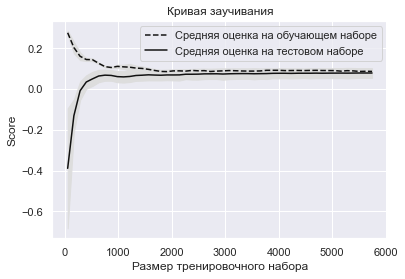

In [74]:
# проверяем, насколько наша оценка зависит от размера тренировочного набора

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), 
                                                        X_train,
                                                        y_train,
                                                        cv=10,
                                                        train_sizes=np.linspace(0.01, 1.0, 50))


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, '--', color='#111111', label='Средняя оценка на обучающем наборе') 
plt.plot(train_sizes, test_scores_mean, color="#111111", label='Средняя оценка на тестовом наборе')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, color='#DDDDDD')

plt.title('Кривая заучивания')
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Score')
plt.legend(loc='best')
#plt.tight_layout()
plt.show()

Давайте проинтерпретируем этот график.

Рассмотрим пунктирную линию - оценка на обучающем наборе. Чем больше данных, тем хуже оценка. Значит у нас значительное смещение.

Рассмотрим сплошную линию - оценка на тестовом наборе. Чем больше данных, тем выше оценка. Однако эта оценка стабилизируется на значении 0.9 и не изменяется с добавлением новых данных.

Дисперсия у нас небольшая, разрыв между линиями маленький.

Таким образом, наша модель недобучена на обучающих данных.

При интепретации этого графика надо учитывать следующие правила. Кривая оценки эффективности для обучения близка к оценки эффективности для проверки - это недообученная модель. Одна кривая сильно отстает от другой - переобученная (дисперсия, разброс большой). Лучший вариант - по середине.

# Полиномиальная регрессия

Полиноминальная регрессия, по своей сути, это создание дополнительных признаков из имеющихся и подгонка регрессии. Признаки создаются достаточно прямолинейно: имеющиеся возвоздятся в квадрт (куб или любую иную степень, какую установите) и(или) перемножаются. Это не тоже самое создание признаков, которым мы занимались раньше. Когда мы создавали, например, признак по наличию соавтора/переводчика, то делали это вполне осознанно, предполагая, что наличие соавтора вполне может повлиять на качество переведенной книги. В случае же с полиномиальной регрессией мы доверяемся простым математическим операциям. 

In [75]:
from sklearn.preprocessing import PolynomialFeatures

interaction = PolynomialFeatures(3, include_bias=False)
X_interaction = interaction.fit_transform(X_train)

regression = LinearRegression()
model = regression.fit(X_interaction, y_train)
model.score(X_interaction, y_train)


X_predict_interaction = model.predict(X_interaction)
lin_mse = mean_squared_error(y_train, X_predict_interaction)
lin_mse 

0.07141574899144072

# Регуляризация

## Ridge

Основная целья регуляризации - бороться с переобучением. Если наша модель слишком хорошо будет подогнана к тренировочным данным, то плохо будет обобщаться на тестовые и реальные данные. Поэтому можно сказать, что регуляризация, добавляя неопределенности в данные, готовит нашу модель к встречи с реальностью.

На практике сформулированы следующие правила регуляризации:

1) рекомендуется во всех случаях использовать регуляризацию, избегать обычную регрессию;
2) гребневая регуляризация является лучшим выбором по умолчанию;
3) однако, если есть основания полагать, что только несколько признаков имеют влияние на целевой, то рекомендуется использовать лассо-регуляризацию или эластичную. При этом, как правило, эластичная показывает себя лучше, чем лассо.

In [76]:
from sklearn.linear_model import Ridge

regression = Ridge(alpha=0.5)
model = regression.fit(X_train, y_train)
pred_b = model.predict(X_test)
mse = mean_squared_error(y_test, pred_b)
mse 

#попробуем улучшить модель

from sklearn.linear_model import RidgeCV 

regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
model_cv = regr_cv.fit(X_train, y_train)
model_cv.alpha_ 

regression = Ridge(alpha=10)
model = regression.fit(X_train, y_train)
pred_b = model.predict(X_test)
mse = mean_squared_error(y_test, pred_b)
mse 

0.08254599145408942

In [77]:
## Lasso

from sklearn.linear_model import Lasso

regression = Lasso(alpha=10)
model_l = regression.fit(X_train, y_train)
model_predict = model_l.predict(X_test)
mse = mean_squared_error(y_test, model_predict)
mse

0.0870363318337098

# SGDRegressor

In [78]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_test, y_test)
sgd_reg.intercept_, sgd_reg.coef_

sgd_pred = sgd_reg.predict(X_test)

mse = mean_squared_error(y_test, sgd_pred)
mse

0.08476498824113302

# Приложение

Машинное обучение может плохо укладываться в голове, но это только из-за разнообразия применяемых инструментов. Давайте постараемся все это все-таки уложить.

Начнем с нашей цели. Чего мы хотим добиться с помощью машинного обучения? Например, мы хотим показать машине фотографию и ждем, что машина укажет, кто представлен на фотографии. Таким образом, уже из этого мы улавливаем, что у нас есть признаки (фотография) и целевой признак (кто представлен на фотографии). Но чтобы машина на основании показанной фотографии угадывала тех, кто на ней представлен, мы должны ее обучить в том же порядке: показать какую-то другую фотографию и указать, кто на ней представлен. Покажем машине сотни и тысячи таких фотографий с различными изображениями одних и тех же лиц, для каждой фотографии укажем, кто изображен. Это будет обучением. Затем покажем фотографию, но уже не будем указывать, кто изображен. Пусть машина сама угадывает. В этом состоит смысл машинного обучения.

Теперь предположим, что хотим похвастаться своей машиной перед друзья. Пускай друзья принесут свои фотографии, которые не то что машина не видела, но даже и вы не видели. Вы хотите быть уверенны, что машина не подведет. Что это означает? Это означает, что машине перед приходом друзей нужно устроить экзамен. Вы обучали машину, скажем, на 100 фотографиях, а затем просили ее угадать, кто изображен на фото, но только на одном фото. Давайте усложним задачу и покажем не одну фотографию, а, скажем, 30. Угадает ли машина? В одних случаях - да, в других - нет. Сколько таких случаев? Где машина ошибалась?

Итак, мы получили три этапа: мы обучали машину на 100 фотографиях, затем проверяли на 30, а затем можем принимать друзей и устраивать машине серьезную проверку. Это и составляет этапы машинного обучения: тренировку, тестирование, применение к реальным данным.

С этапами разобрались. Теперь начнем с тренировки. Раз мы показываем фотографии и ждем ответа от машины, значит надо решить несколько задач. Мы должны выбрать собственно ту машину, которая будет обучаться. Далее мы должны сравнить наши тестовые данные с требованиями, которые предъявляются для тренировочных данных этой конкретной разновидности машины. Определившись с этим мы должны исправить или улучшить наши данные так, чтобы они подходили по выбранную модель обучения. Кроме того, мы дожны разбить данные на две (или на три - в идеале) части: тренировочную и тестовую. 

Теперь мы готовы к обучению модели. Каждая модель определяется набором гиперпараметров. Изначально мы не изменяем параметры. Проводим обучение на тренировочных данных. После этого используем тестовые данные для оценки нашей модели. Если нас все устраивает, то можем выпускать модель в реальную жизнь. Не устраивает? Тогда начинаем настройку: изменяем параметры модели, собираем дополнительные данные, изменяем, улучшаем данные. После этого опять проводим обучение и оценку. Устраивает? Пользуемся. Не устраивает? Еще раз настраиваем. И так, пока результат оценки нас не устроит.

С этим все должно быть понятно. Однако машинное обучение, так сложилось, имеет ряд дополнительных инструментов. Вот эти-то инструменты, точнее их место и роль в машинном обучении, могут сбивать с толку. Давайте я попытаюсь вам помочь с помощью списка.

Этап 1. Обучение. Используем тренировочный набор.

1) Pipline. На первом этапе, как помним, нам надо убедиться, что наши данные подходят для модели обучения, или улучшить их так, чтобы они подходили. Далее мы применяем модель обучения. Предположим, что наши данные требуют доработки. Тогда мы можем применить различные способа обработки к данным последовательно с помощью этого инструмента. Кроме того, после обработки мы, в том же инструменте, можем применить и разные модели обучения (или одну, если мы уже точно определились). Все это делается просто через составление словаря, который содержит набор строк, каждая из которых отражает конкретный способ обработки данных и модель обучения.

2) GridSearch. Это поиск по сетке. Изначально мы обучаем модель на параметрах, установленных по умолчанию. Если мы недовольны результатом и думаем, что все дело в параметрах модели, то надо отыскать такие параметры, которые нас устроят. Как это сделать? Мы бы хотели создать десятки или сотни моделей, но чтобы у каждого экземпляра модели был свой набор параметров. Каждую такую модель мы хотим обучить и провести оценку. Найдем лучшую оценку, возьмем те параметры, с которыми модель выдала эту лучшую оценку. Именно эту задачу решает поиск по сетке. Представьте таблицу. Строки - это наши модели. Столбцы - настраиваемые параметры. Заполняем ячейки теми значениями, которые хоти проверить. Далее берем каждую строку, обучаем, оцениваем. 

3) CV. Кросс-валидация. Может применяться в составе GridSearch или отдельно. Суть заключается в том, что мы многократно разделяем наш набор данных на тренировочный и тестовый. На каждом полученном наборе проводим обучение, оценку. Смотрим, какой наилучший вариант можно получить.

4) Кривая заучивания.
